<a href="https://colab.research.google.com/github/cnhzgb/MachineL/blob/main/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipdb
!pip install einops

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from einops import rearrange
import ipdb
from torchsummary import summary

device = "cuda" if torch.cuda.is_available() else "cpu"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 704.7 kB/s eta 0:00:00


In [ ]:
trans = transforms.Compose([transforms.ToTensor()])
dataset = datasets.CIFAR10(root="dataset/", transform=trans, download=True, train=True) # 5W张图片, 10种分类
loader = DataLoader(dataset, batch_size=100, shuffle=True)
batch_num,(image, label) = next(enumerate(loader))
print(len(dataset.classes), len(dataset), image.shape, label.shape) # 10; 5W; 100,3,32,32; 100

trans_test = transforms.Compose([transforms.ToTensor()])
dataset_test = datasets.CIFAR10(root="dataset/", transform=trans_test, download=True, train=False) # 1W张图片
loader_test = DataLoader(dataset_test, batch_size=100, shuffle=True)
criterion_test = nn.CrossEntropyLoss()

Files already downloaded and verified
10 50000 torch.Size([100, 3, 32, 32]) torch.Size([100])


In [2]:
class net(nn.Module):
  def __init__(self):
    super(net, self).__init__()
    self.conv = nn.Conv2d(in_channels=3, out_channels=6, kernel_size = 3, stride = 1)
    self.pool = nn.MaxPool2d(kernel_size = 3, stride = 3) # 池化层
    self.relu = nn.ReLU()
    self.dense = nn.Linear(600, 10)

  def forward(self, x): # 100,3,32,32
    x = self.conv(x) # => 100,6,30,30
    x = self.relu(x)
    x = self.pool(x) # => 100,6,10,10
    x = x.view(x.size(0), -1) # => 100,600
    x = self.dense(x) # => 100,10
    return x

model = net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)

summary(model, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 30, 30]             168
              ReLU-2            [-1, 6, 30, 30]               0
         MaxPool2d-3            [-1, 6, 10, 10]               0
            Linear-4                   [-1, 10]           6,010
Total params: 6,178
Trainable params: 6,178
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.09
Params size (MB): 0.02
Estimated Total Size (MB): 0.12
----------------------------------------------------------------


In [ ]:
for epoch in range(1,10):
  total_loss = []
  errorTotal = 0
  for batch_idx, (img, label) in enumerate(loader):
    img = img.to(device)
    label = label.to(device)
    outputs = model(img)
    loss = criterion(outputs, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss.append(loss.item())
    maxV,maxIdx = outputs.max(dim=1)
    errorNum = torch.sum(torch.ne(maxIdx, label)).item()
    errorTotal += errorNum

    if(batch_idx % 100 == 99):
      print("epoch:{} batch:{} loss:{:.2f} mean:{:.2f} error:{}/100 errorTotal:{}/{} {:.2f}%".format(epoch, batch_idx, loss, np.mean(total_loss), errorNum, errorTotal, (batch_idx+1)*100, errorTotal/(batch_idx+1)))

epoch:1 batch:99 loss:1.82 mean:1.84 error:64/100 errorTotal:6275/10000 62.75%
epoch:1 batch:199 loss:1.89 mean:1.84 error:69/100 errorTotal:12580/20000 62.90%
epoch:1 batch:299 loss:1.88 mean:1.83 error:59/100 errorTotal:18751/30000 62.50%
epoch:1 batch:399 loss:1.83 mean:1.82 error:67/100 errorTotal:25016/40000 62.54%
epoch:1 batch:499 loss:1.79 mean:1.81 error:61/100 errorTotal:31152/50000 62.30%
epoch:2 batch:99 loss:1.88 mean:1.77 error:65/100 errorTotal:6049/10000 60.49%
epoch:2 batch:199 loss:1.70 mean:1.77 error:52/100 errorTotal:12109/20000 60.55%
epoch:2 batch:299 loss:1.83 mean:1.76 error:69/100 errorTotal:18119/30000 60.40%
epoch:2 batch:399 loss:1.68 mean:1.76 error:61/100 errorTotal:24200/40000 60.50%
epoch:2 batch:499 loss:1.88 mean:1.76 error:60/100 errorTotal:30248/50000 60.50%
epoch:3 batch:99 loss:1.71 mean:1.75 error:55/100 errorTotal:6104/10000 61.04%
epoch:3 batch:199 loss:1.71 mean:1.73 error:60/100 errorTotal:11993/20000 59.97%
epoch:3 batch:299 loss:1.78 mean:1

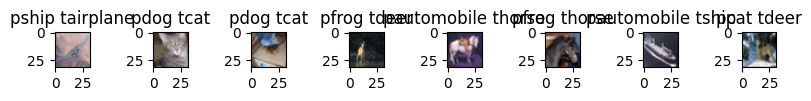

batch:9 loss:1.93 mean:1.96 error:71/100 errorTotal:647/1000 64.70%


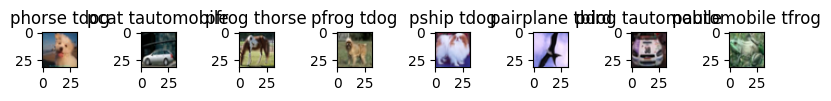

batch:19 loss:1.95 mean:1.95 error:62/100 errorTotal:1291/2000 64.55%


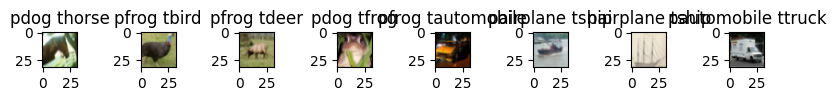

batch:29 loss:1.96 mean:1.96 error:74/100 errorTotal:1978/3000 65.93%


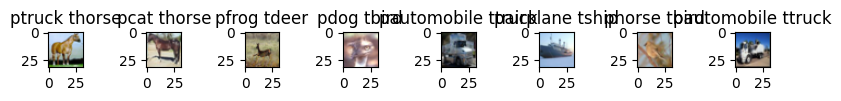

batch:39 loss:1.98 mean:1.96 error:68/100 errorTotal:2651/4000 66.28%


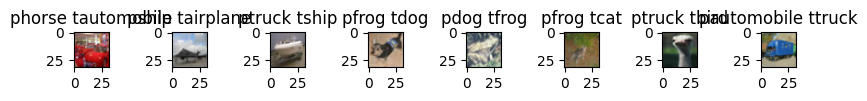

batch:49 loss:1.92 mean:1.97 error:64/100 errorTotal:3347/5000 66.94%


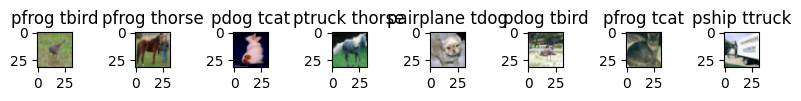

batch:59 loss:1.99 mean:1.97 error:69/100 errorTotal:4038/6000 67.30%


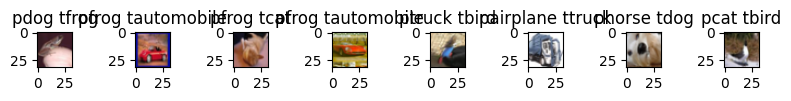

batch:69 loss:2.09 mean:1.97 error:72/100 errorTotal:4740/7000 67.71%


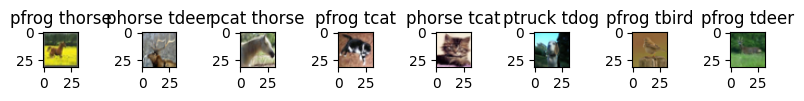

batch:79 loss:1.99 mean:1.97 error:68/100 errorTotal:5423/8000 67.79%


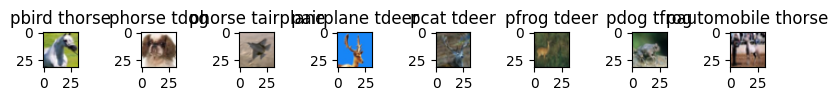

batch:89 loss:2.04 mean:1.97 error:68/100 errorTotal:6098/9000 67.76%


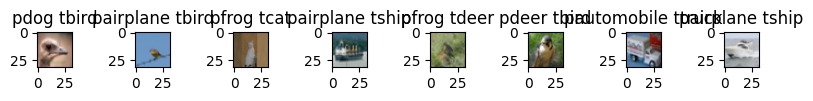

batch:99 loss:1.89 mean:1.98 error:60/100 errorTotal:6788/10000 67.88%


In [ ]:
total_loss = []
errorTotal = 0
for batch_idx, (img, label) in enumerate(loader_test): # 1W张图片, 100批, 100,3,32,32
  img = img.to(device)
  label = label.to(device)

  output = model(img)
  loss = criterion_test(output, label)
  total_loss.append(loss.item())

  maxV,maxIdx = output.max(dim=1)
  errorNum = torch.sum(torch.ne(maxIdx, label)).item()
  errorTotal += errorNum

  noMatchIdx = torch.nonzero(torch.ne(maxIdx, label)).view(-1)

  if(batch_idx % 10 == 9):
    if errorNum > 8: colNum = 8
    else: colNum = errorNum
    fig, axs = plt.subplots(1, colNum, figsize=(colNum, 1))
    for i, ax in enumerate(axs.flatten()):
      idx = noMatchIdx[i]
      ax.imshow(rearrange(img[idx], 'c h w -> h w c').cpu()) # 3,32,32 => 32,32,3
      ax.set_title('p{} t{}'.format(dataset.classes[maxIdx[idx]], dataset.classes[label[idx]]))
    plt.tight_layout()
    plt.show()
    print("batch:{} loss:{:.2f} mean:{:.2f} error:{}/100 errorTotal:{}/{} {:.2f}%".format(batch_idx, loss, np.mean(total_loss), errorNum, errorTotal, (batch_idx+1)*100, errorTotal/(batch_idx+1)))